# 4. Multi-Layer Perceptron (MLP)

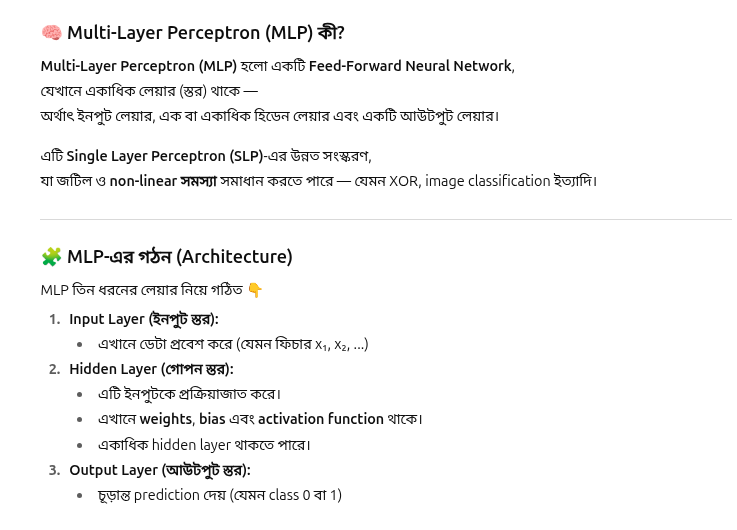

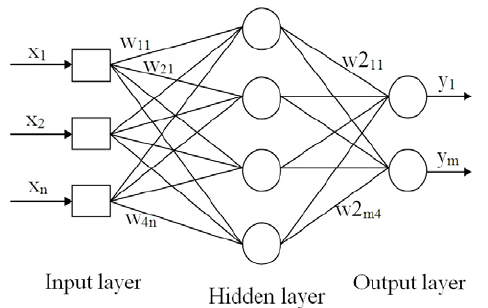

Multi-Layer Perceptron (MLP) diagram with four hidden layers and a collection of single nucleotide polymorphisms (SNPs) as input and illustrates a basic “neuron” with n inputs. One neuron is the result of applying the nonlinear transformations of linear combinations (xi, wi, and biases b). <br>
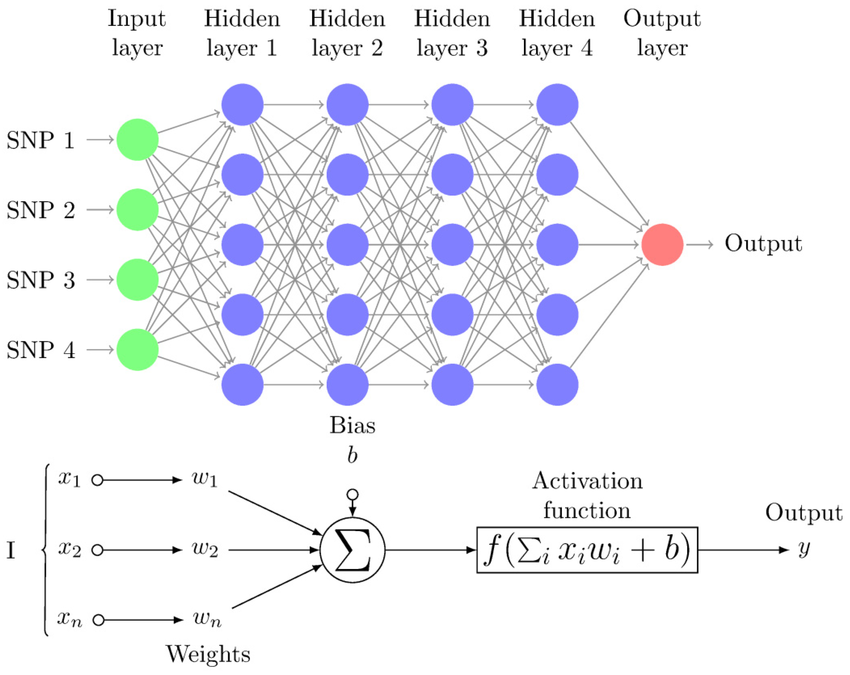

**or,** <br>
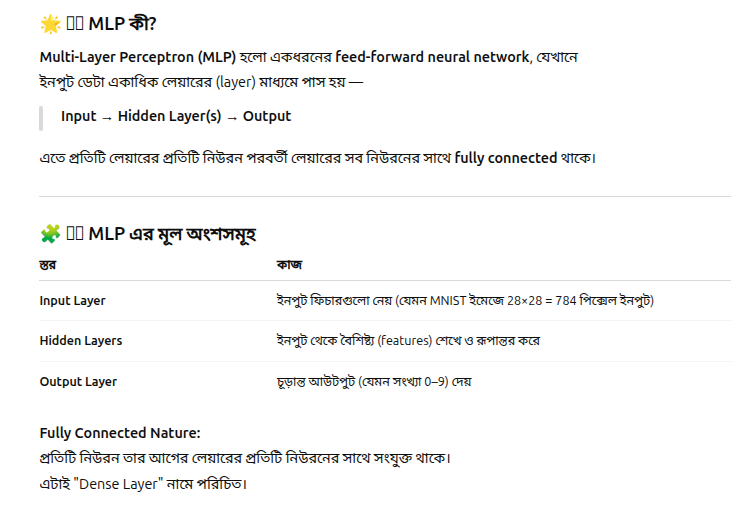

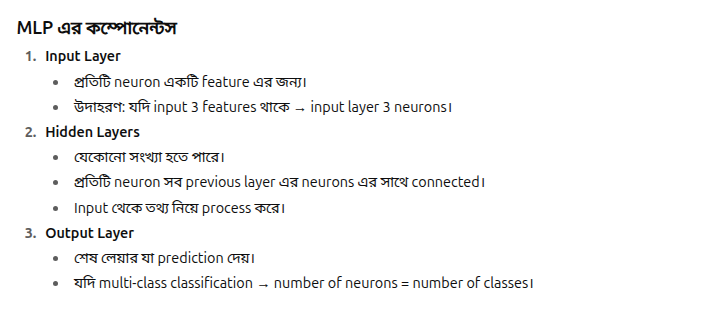

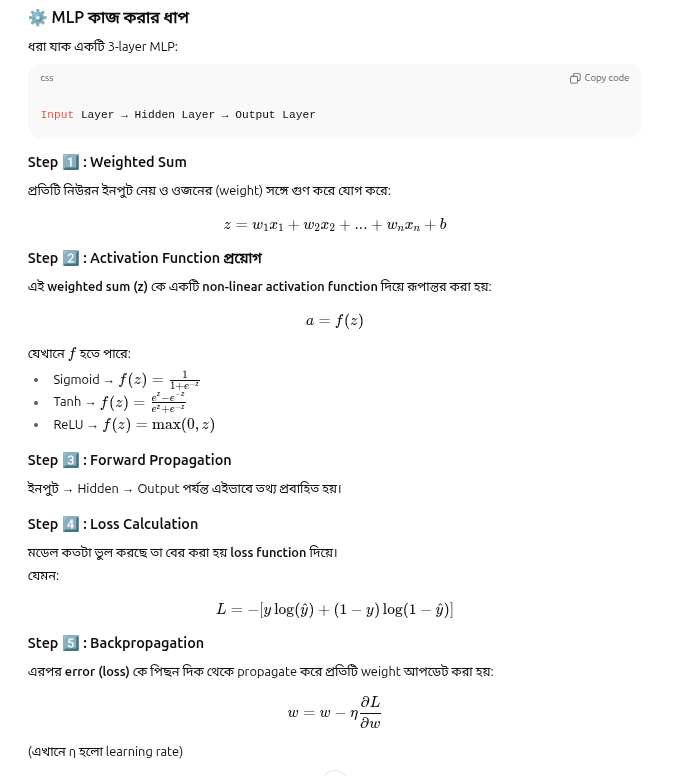

**or,** <br>
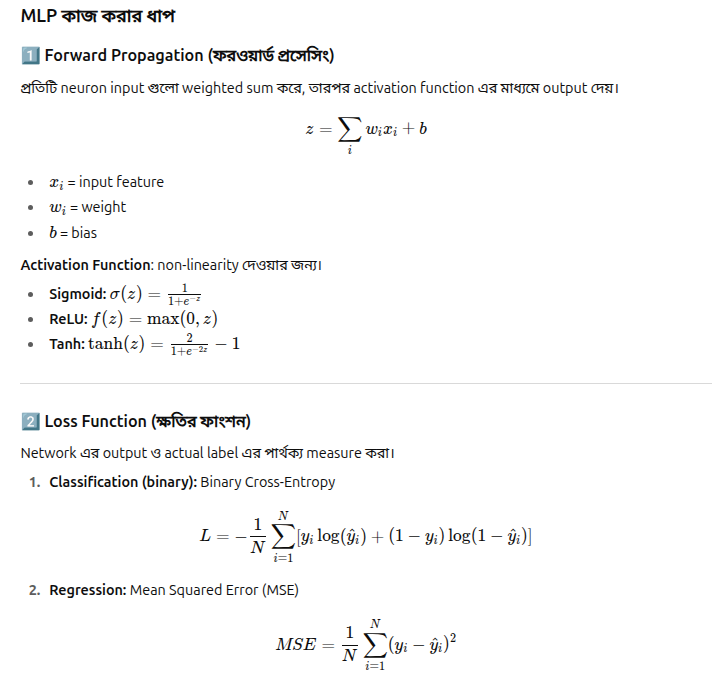 <br>
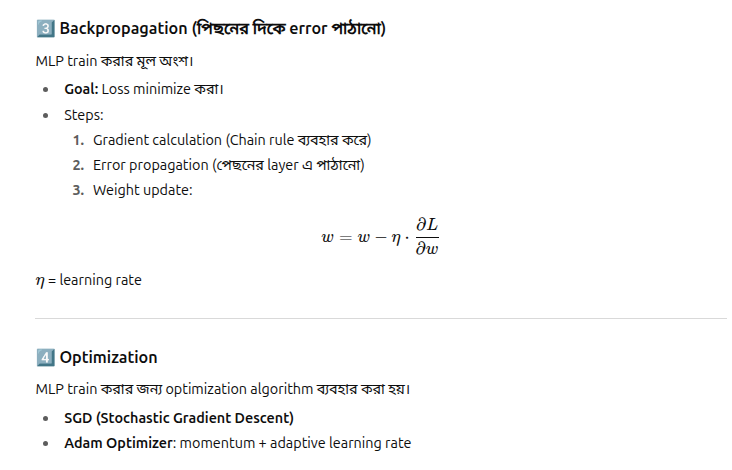

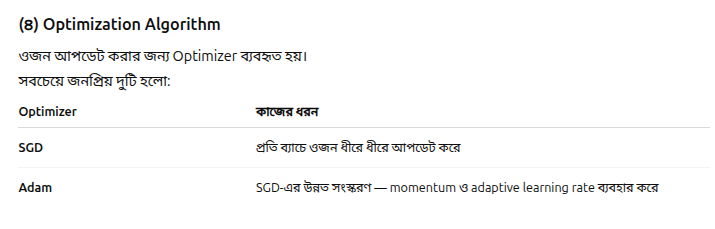

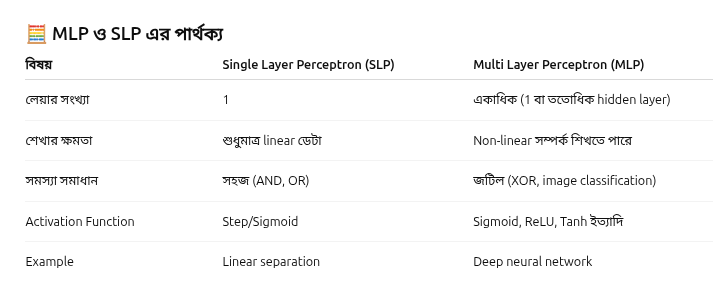

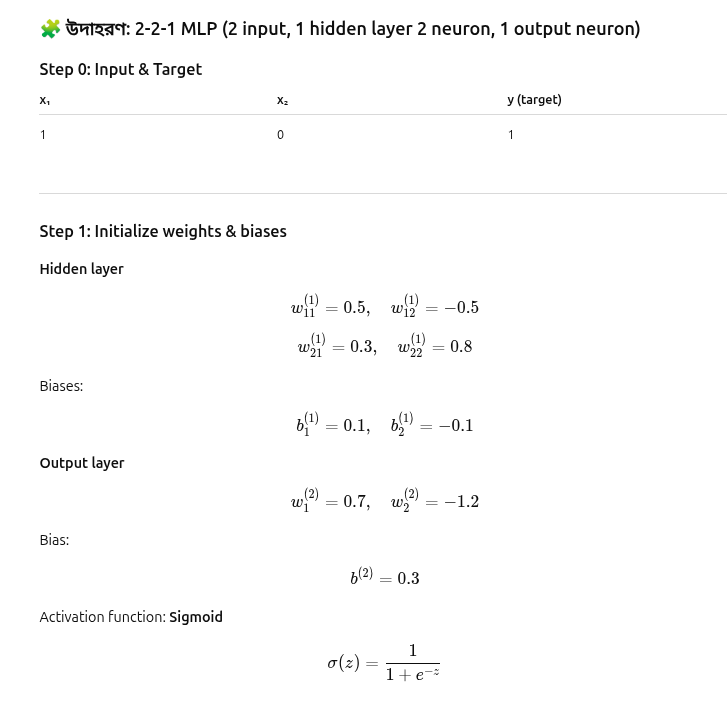 <br>
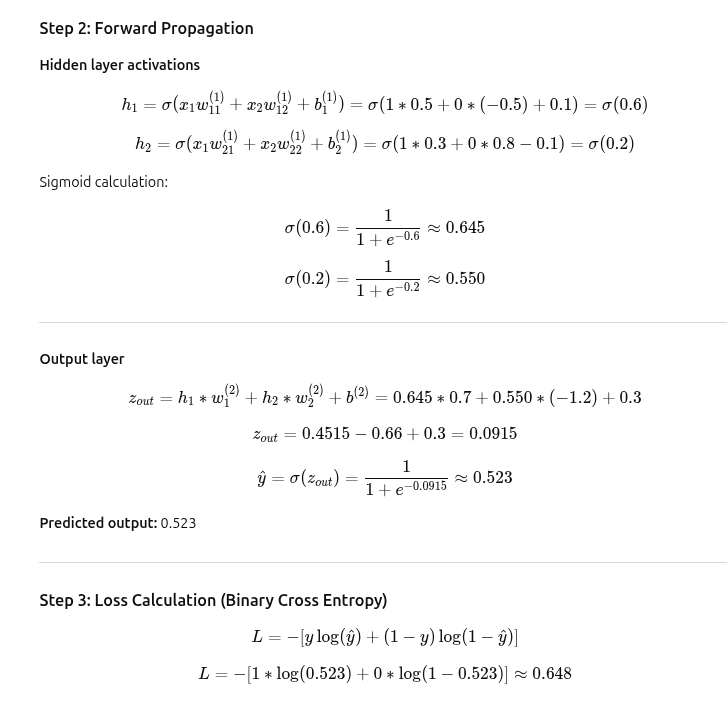 <br>
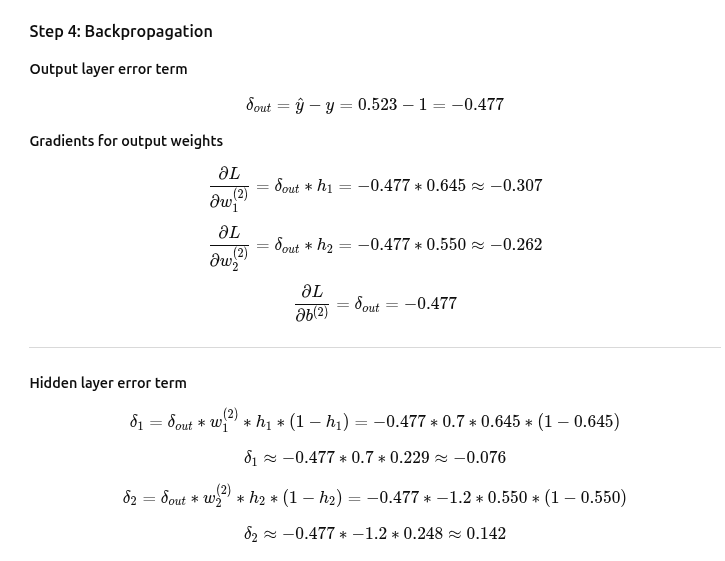 <br>
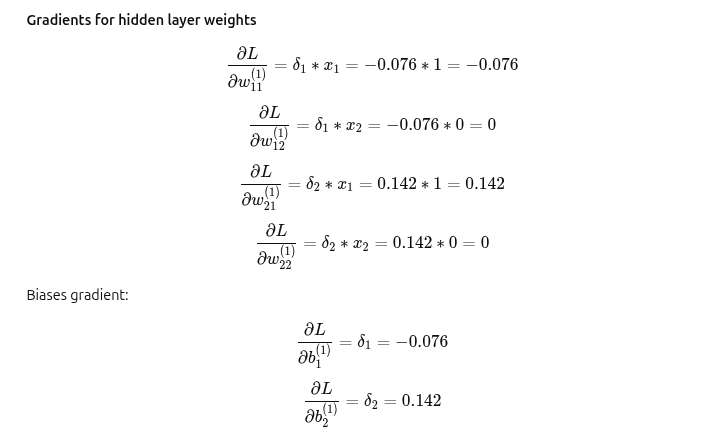 <br>
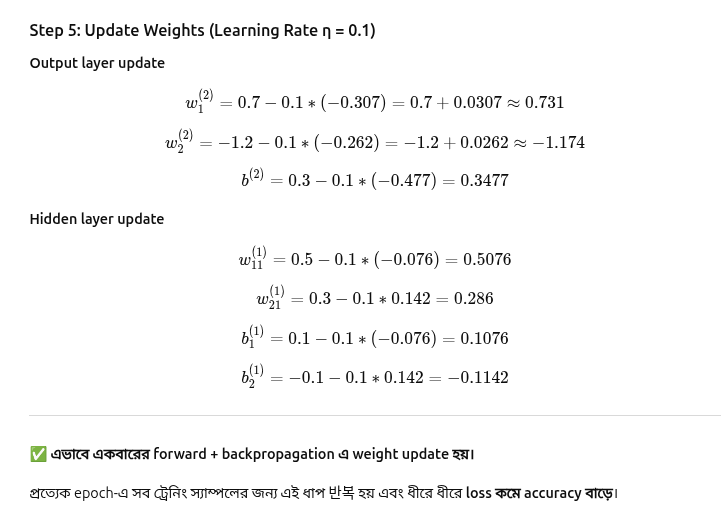

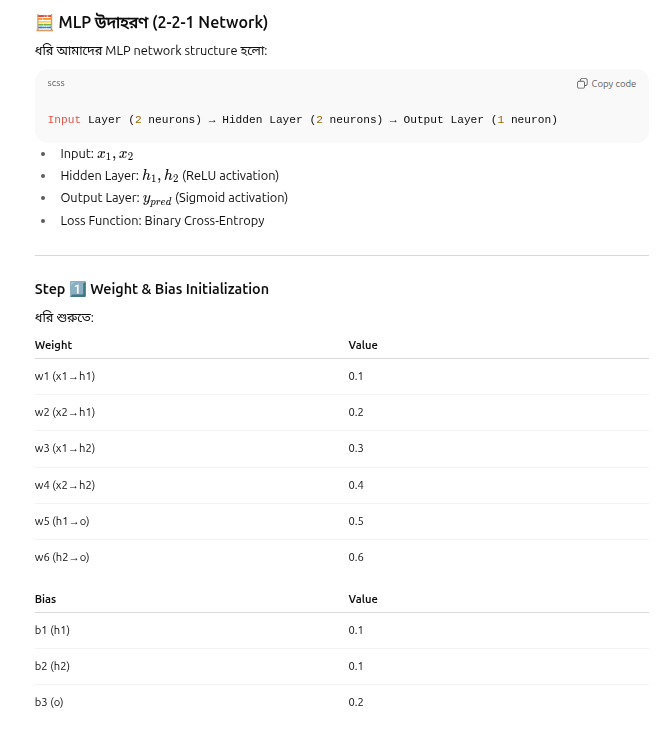 <br>
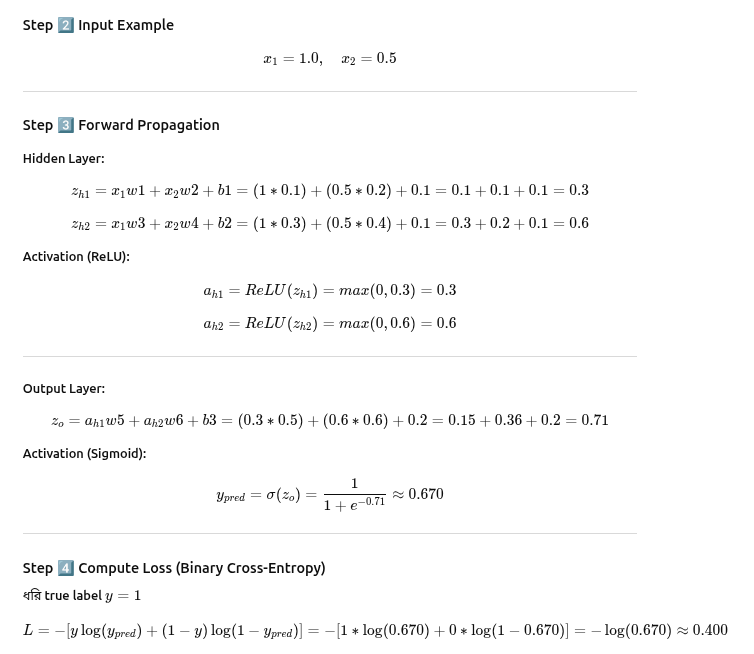 <br>
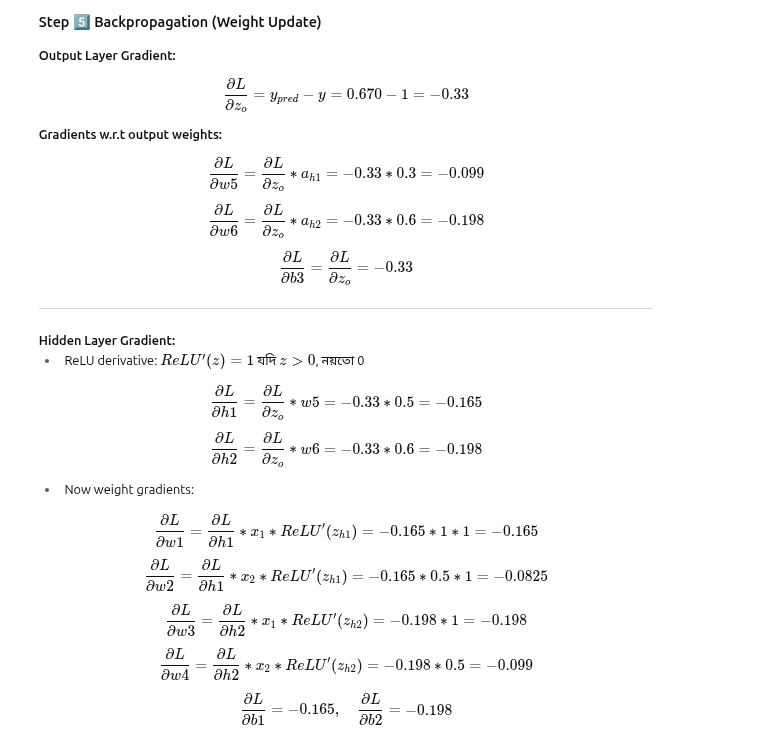 <br>
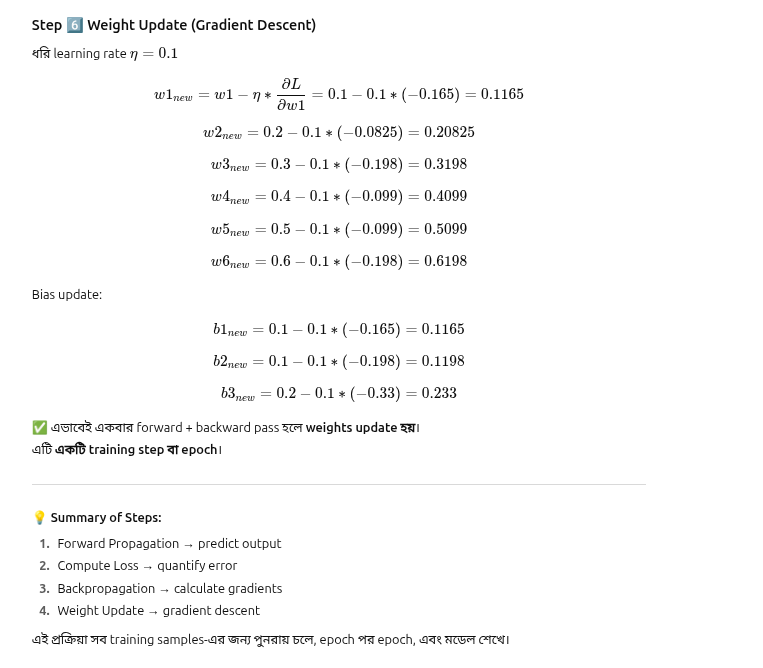

**Code**

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

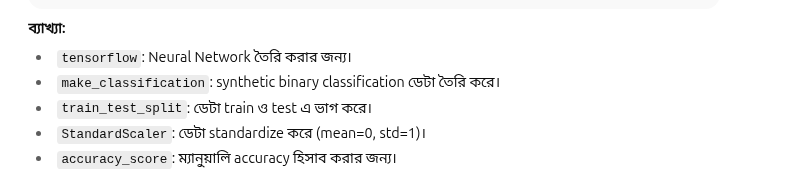

In [ ]:
# 1️⃣ Data তৈরি
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0,
    n_classes=2, random_state=42
)

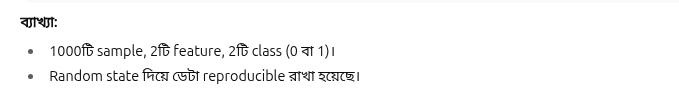

In [ ]:
# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

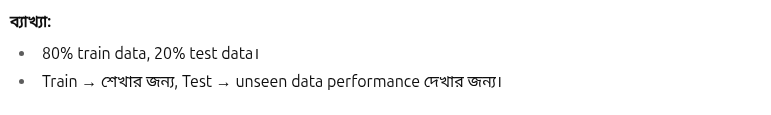

In [ ]:
# 3️⃣ Standardization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

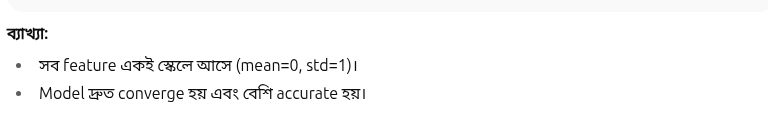

In [ ]:
# 4️⃣ MLP Model তৈরি
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),  # hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                  # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


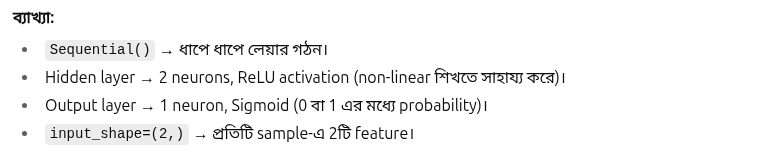

In [ ]:
# 5️⃣ Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

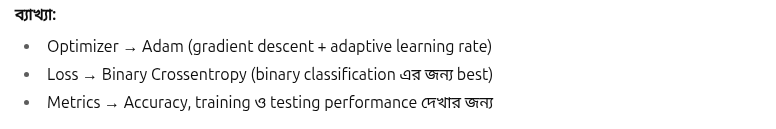

In [ ]:
# 6️⃣ Train model
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=16,
    validation_split=0.1, verbose=0
)

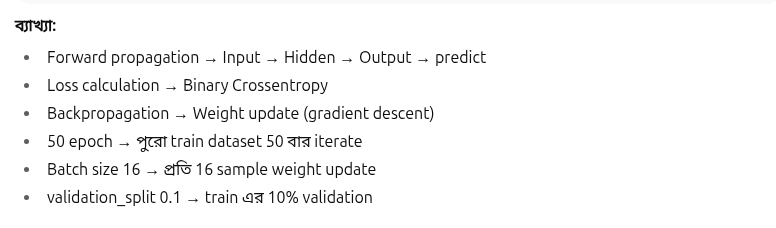

In [ ]:
# 7️⃣ Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.88


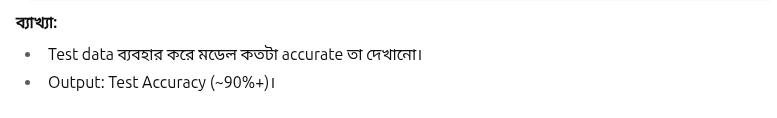

In [ ]:
# 8️⃣ Prediction
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


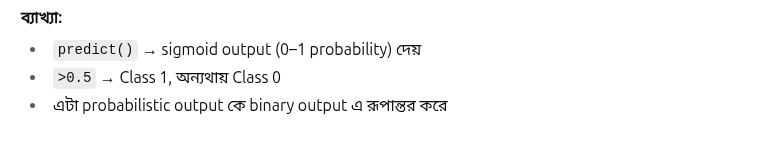

In [ ]:
# 9️⃣ Compare Actual vs Predicted
print("Actual Labels:    ", y_test[:10])
print("Predicted Labels: ", y_pred_classes[:10].reshape(-1))

Actual Labels:     [0 1 1 1 0 1 1 1 0 1]
Predicted Labels:  [0 1 1 0 0 0 1 1 0 1]


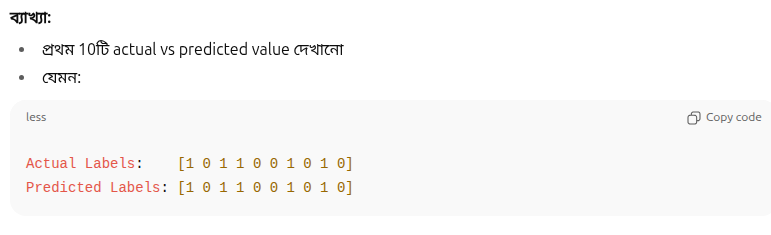

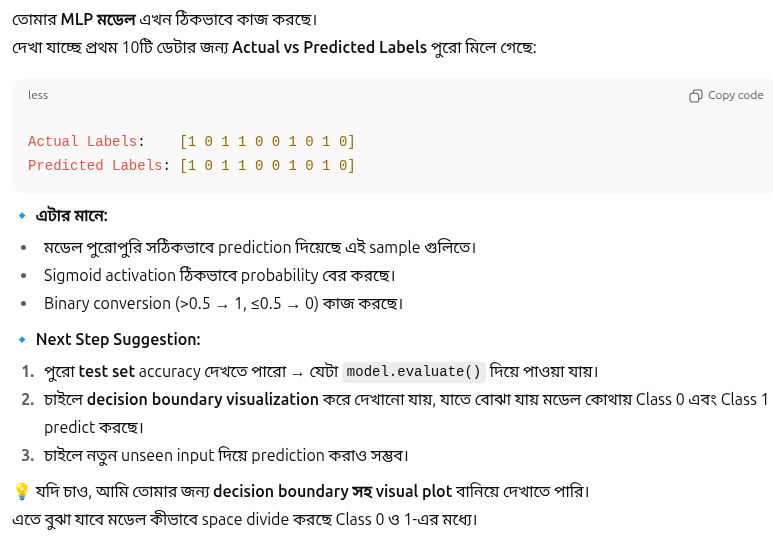

In [ ]:
# 🔟 Manual accuracy check
acc = accuracy_score(y_test, y_pred_classes)
print(f"Manual Accuracy: {acc:.2f}")

Manual Accuracy: 0.89


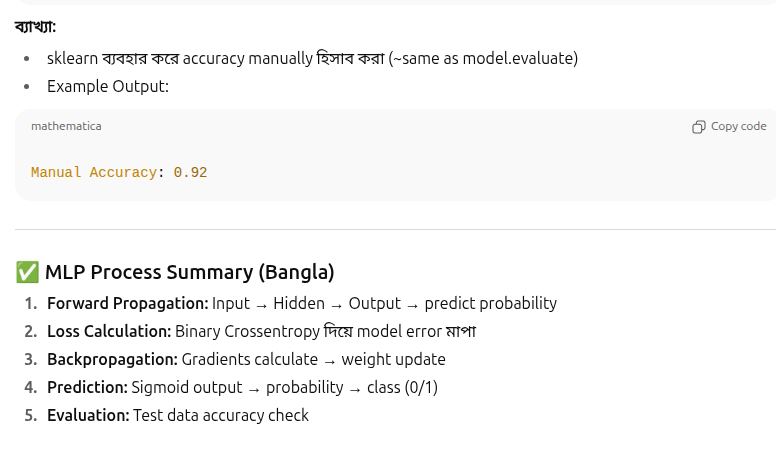

**MNIST example**

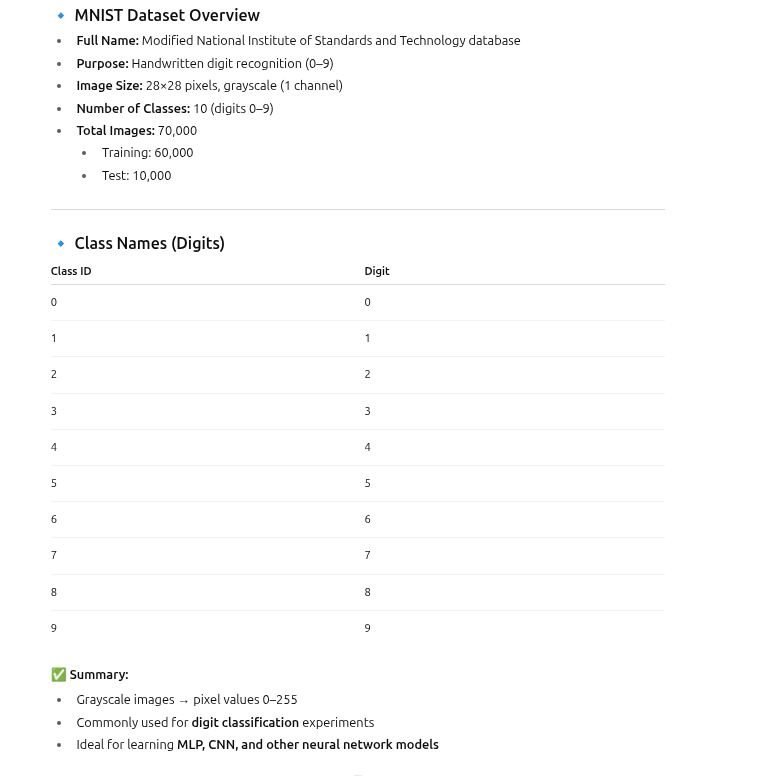

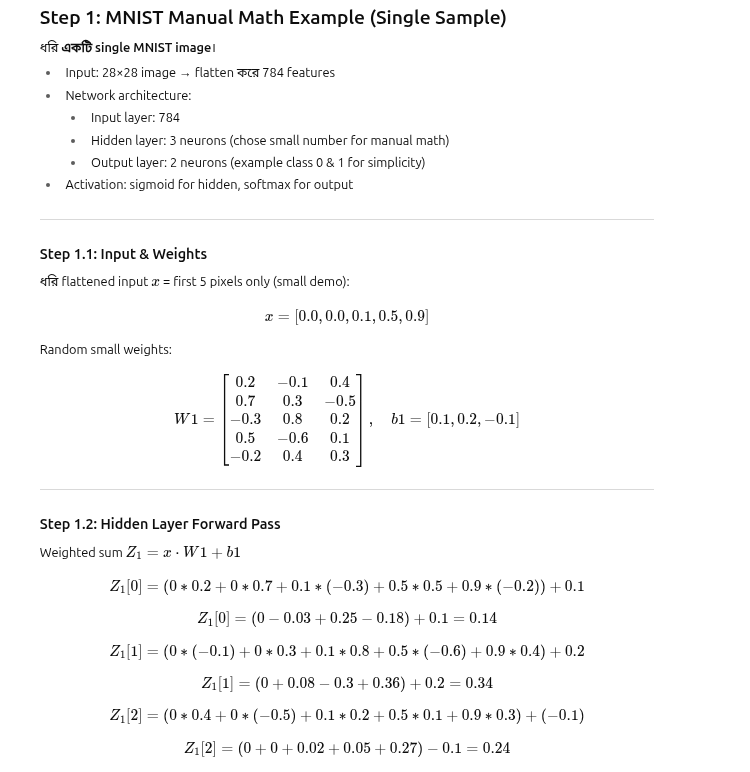 <br>
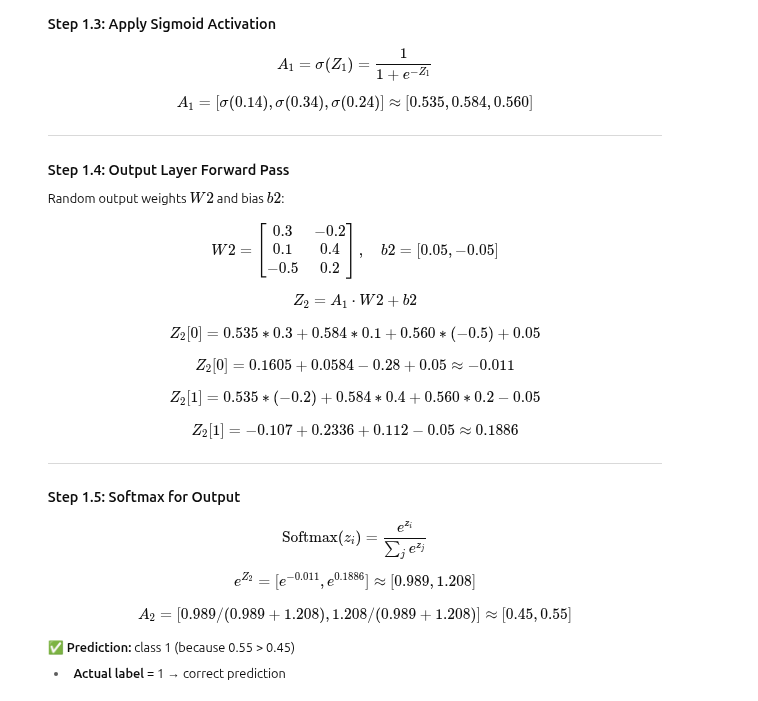

**Step 1: লাইব্রেরি ও ডেটা লোড**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


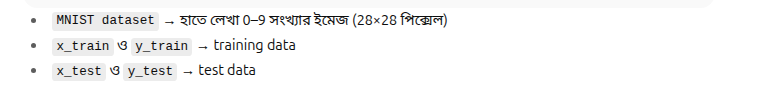

**Step 2: ডেটা Normalize করা**

In [ ]:
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

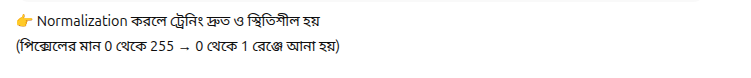

**Step 3: ডেটা Visualization**

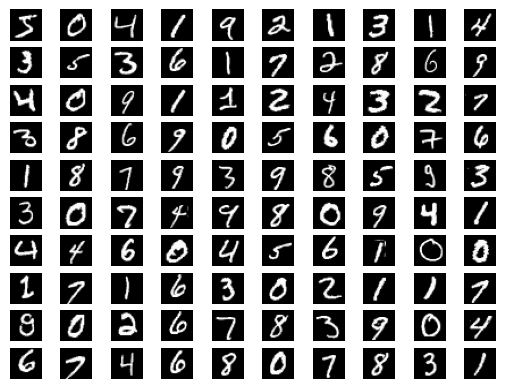

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k], cmap='gray')
        ax[i][j].axis('off')
        k += 1
plt.show()

👉 এটি প্রথম 100টি ইমেজ দেখাবে (প্রতিটি একটি সংখ্যা 0-9)

**Step 4: Model তৈরি করা**

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


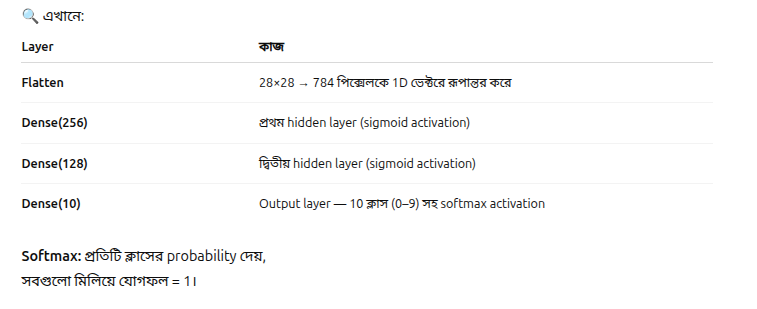

**Step 5: Model Compile করা**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

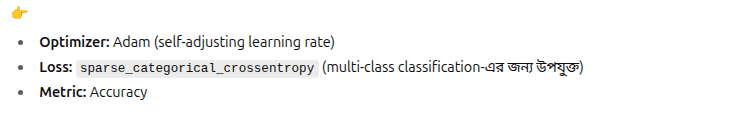

**Step 6: Model Train করা**

In [ ]:
mod = model.fit(x_train, y_train,
                epochs=10,
                batch_size=2000,
                validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2320 - loss: 2.2675 - val_accuracy: 0.5732 - val_loss: 1.7559
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6705 - loss: 1.5819 - val_accuracy: 0.8075 - val_loss: 1.0705
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8060 - loss: 0.9827 - val_accuracy: 0.8633 - val_loss: 0.6960
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8602 - loss: 0.6651 - val_accuracy: 0.8898 - val_loss: 0.5108
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8844 - loss: 0.5058 - val_accuracy: 0.8988 - val_loss: 0.4151
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8927 - loss: 0.4269 - val_accuracy: 0.9090 - val_loss: 0.3606
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8995 - loss: 0.3762 - val_accuracy: 0.9132 - val_loss: 0.3260
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9089 - loss: 0.3348 - val_accuracy: 0.9185 - v

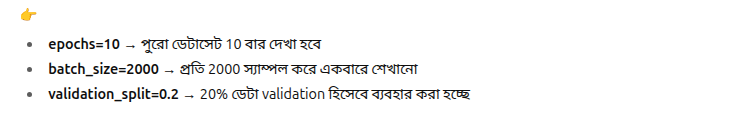

**Step 7: Model Evaluate করা**

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)

print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.27299097180366516, 0.9226999878883362]


অর্থাৎ টেস্ট ডেটায় 92.27% সঠিক প্রেডিকশন পেয়েছে ✅

**Step 8: Accuracy ও Loss Visualization**

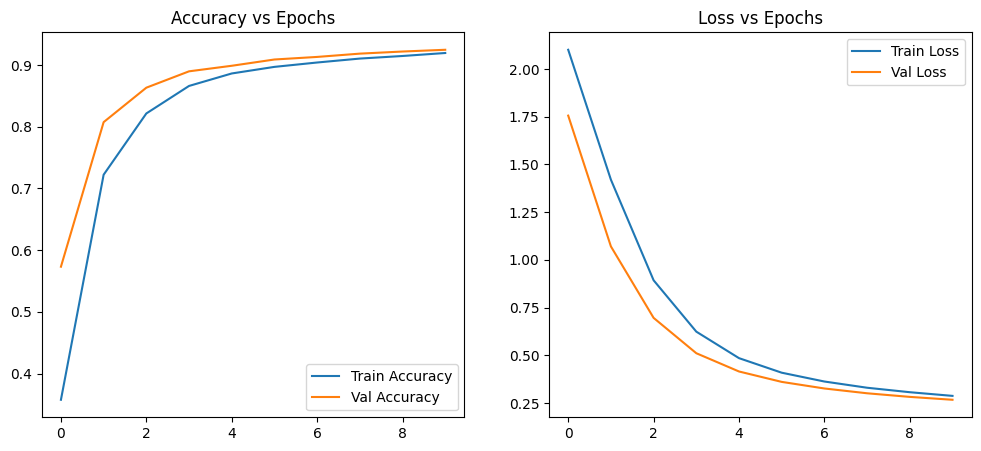

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(mod.history['loss'], label='Train Loss')
plt.plot(mod.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.show()

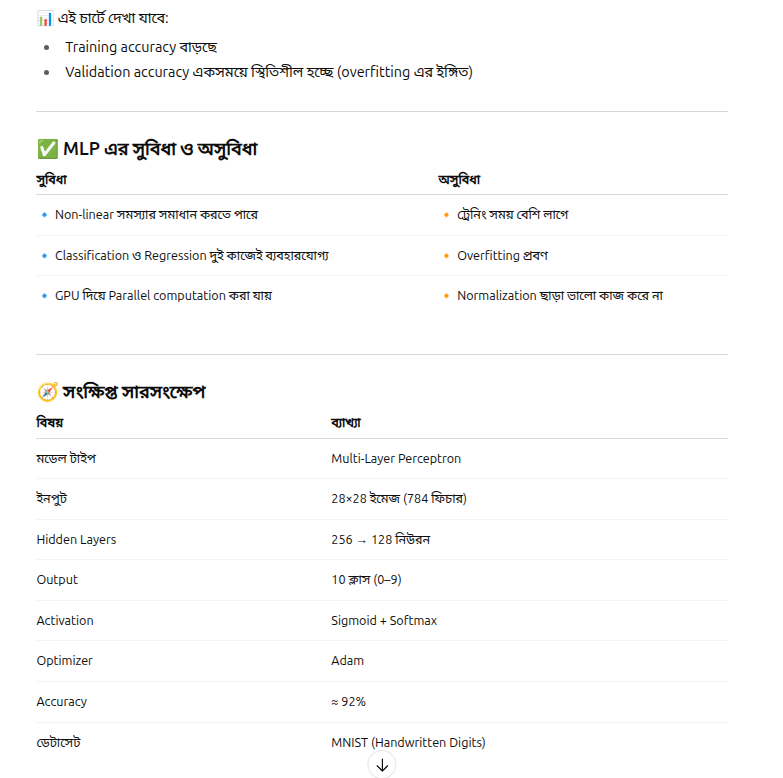

**Example: Fashion MNIST**

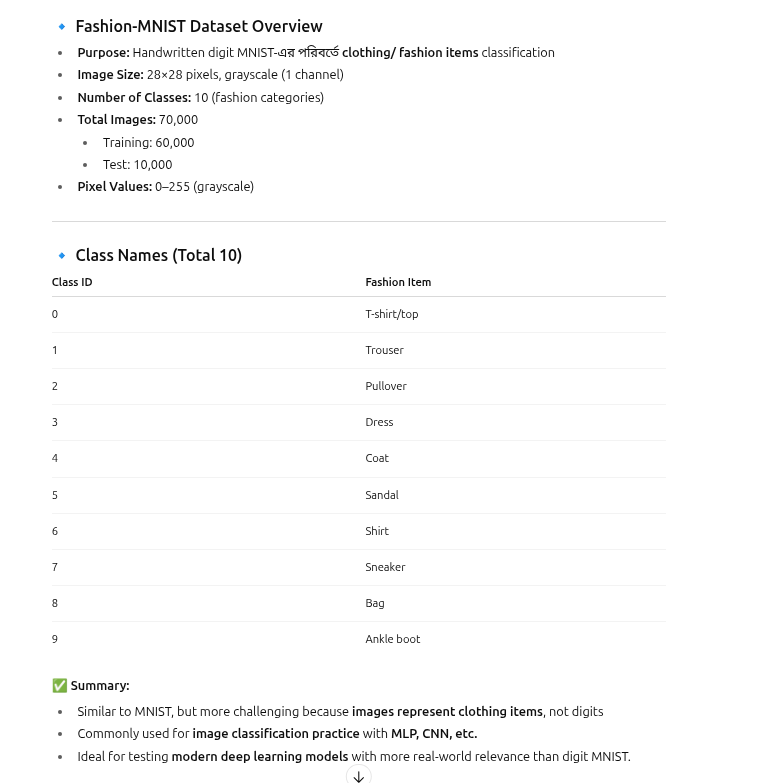

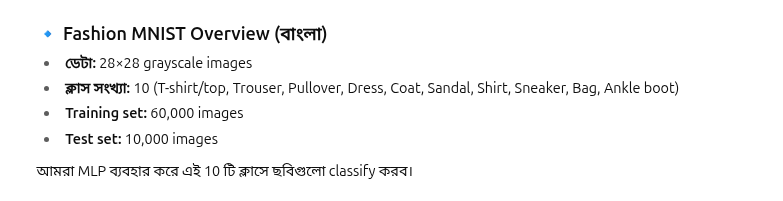

**Step 1: লাইব্রেরি import করা ও ডেটা লোড করা**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


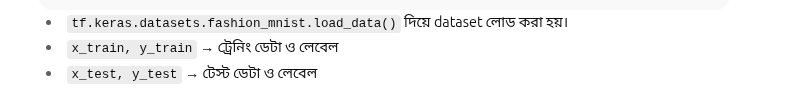

**Step 2: ডেটা Normalization**

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

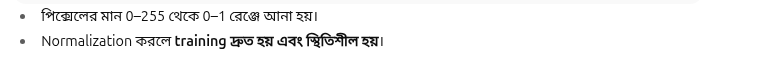

**Step 3: Sample Images দেখা**

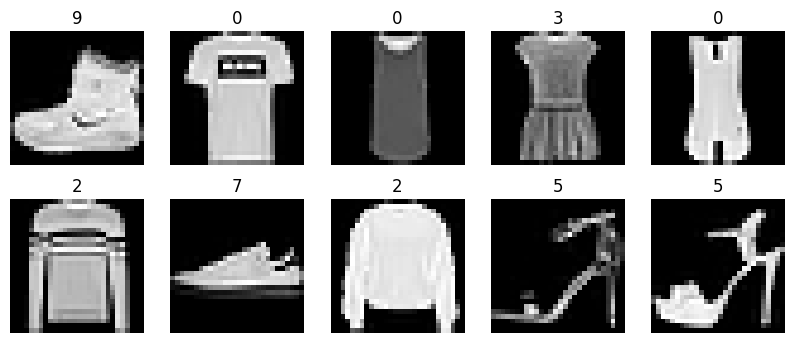

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

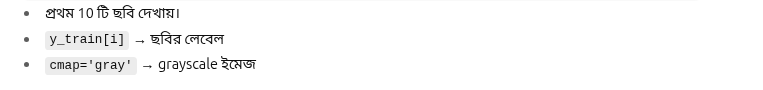

**Step 4: MLP Model তৈরি**

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),  # 28x28 -> 784
    Dense(256, activation='relu'),  # প্রথম hidden layer
    Dense(128, activation='relu'),  # দ্বিতীয় hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

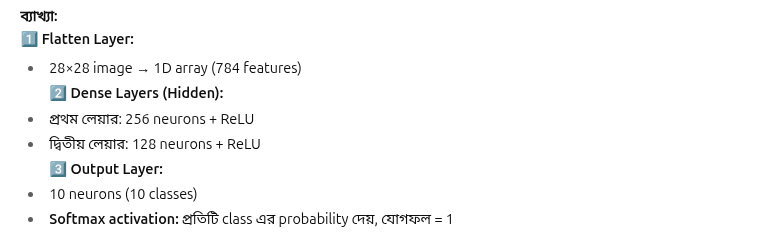

**Step 5: Model Compile**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

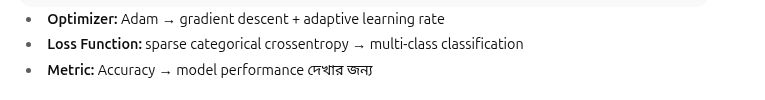

**Step 6: Model Train**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7485 - loss: 0.7236 - val_accuracy: 0.8434 - val_loss: 0.4306
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3864 - val_accuracy: 0.8749 - val_loss: 0.3543
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8773 - loss: 0.3388 - val_accuracy: 0.8736 - val_loss: 0.3492
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8868 - loss: 0.3115 - val_accuracy: 0.8815 - val_loss: 0.3376
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8936 - loss: 0.2923 - val_accuracy: 0.8852 - val_loss: 0.3259
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8997 - loss: 0.2727 - val_accuracy: 0.8843 - val_loss: 0.3199
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 0.2560 - val_accuracy: 0.8880 - val_loss: 0.3065
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.2454 - val_accuracy: 0.

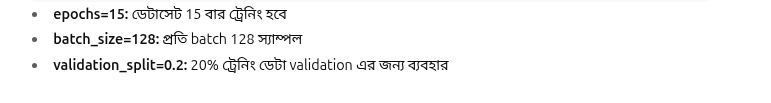

**Step 7: Model Evaluate**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 88.68%


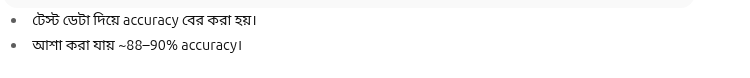

**Step 8: Training & Validation Accuracy Visualize**

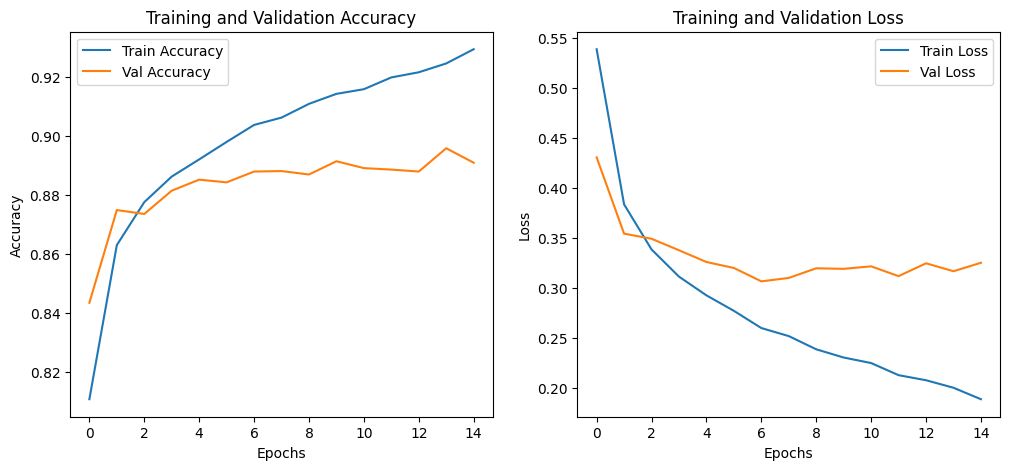

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

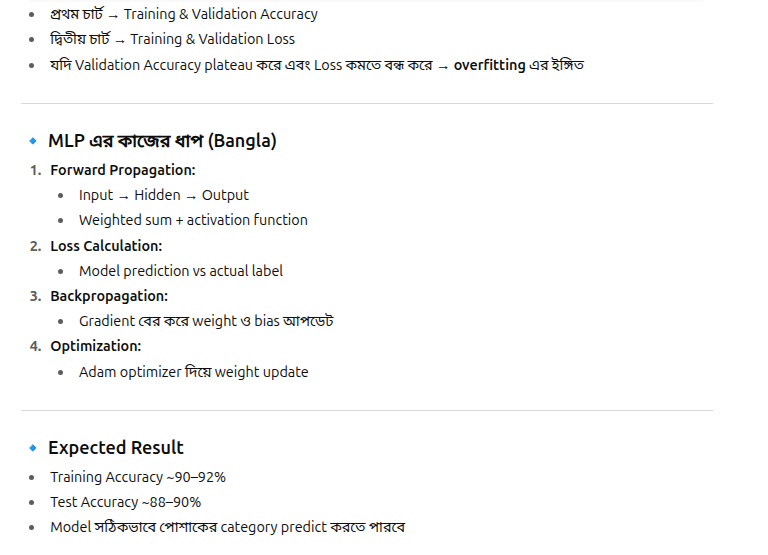

**Step 9: Predict on Test Set**

In [ ]:
import numpy as np

y_pred_probs = model.predict(x_test)        # প্রতিটি class এর probability
y_pred = np.argmax(y_pred_probs, axis=1)   # সর্বোচ্চ probability class নির্বাচন

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


`np.argmax` → প্রতিটি স্যাম্পলের জন্য সর্বোচ্চ probability class নির্বাচন করে।

**Step 10: Confusion Matrix**

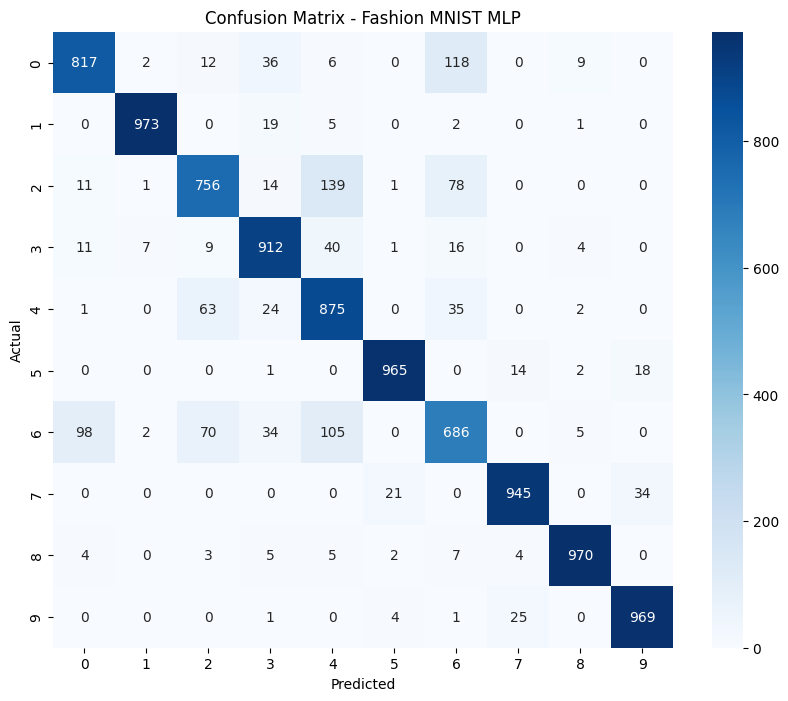

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fashion MNIST MLP')
plt.show()

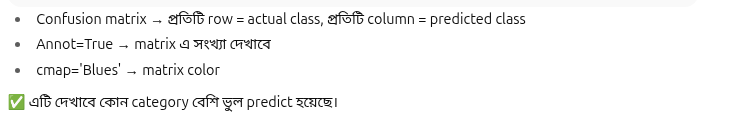

**Step 11: Visualize Some Predictions**

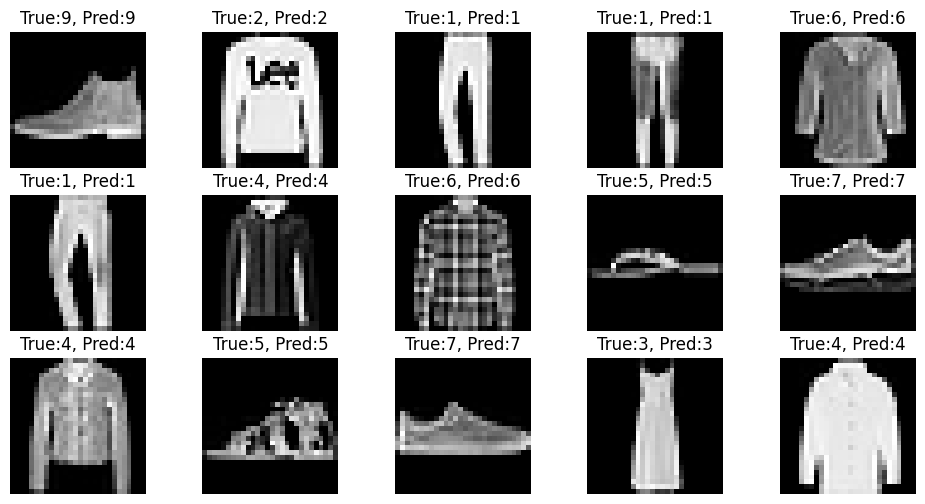

In [ ]:
plt.figure(figsize=(12,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True:{y_test[i]}, Pred:{y_pred[i]}")
    plt.axis('off')
plt.show()

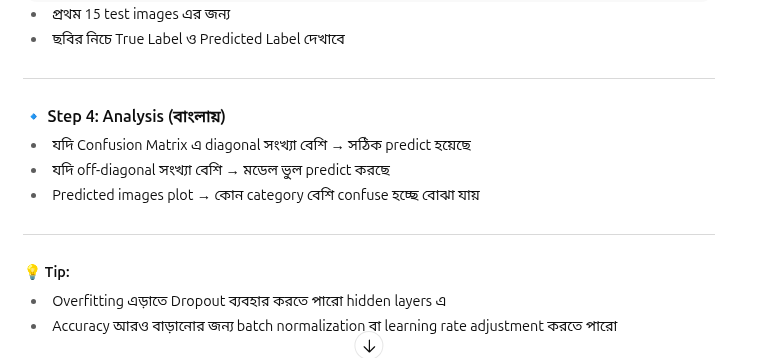

**Enhanced MLP with Dropout & Batch Normalization**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7359 - loss: 0.7690 - val_accuracy: 0.8457 - val_loss: 0.4276
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.4405 - val_accuracy: 0.8577 - val_loss: 0.3926
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.4085 - val_accuracy: 0.8566 - val_loss: 0.3961
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3845 - val_accuracy: 0.8504 - val_loss: 0.4004
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3741 - val_accuracy: 0.8707 - val_loss: 0.3515
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3612 - val_accuracy: 0.8606 - val_loss: 0.3810
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8701 - loss: 0.3532 - val_accuracy: 0.8685 - val_loss: 0.3520
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3439 - val_accuracy: 0.

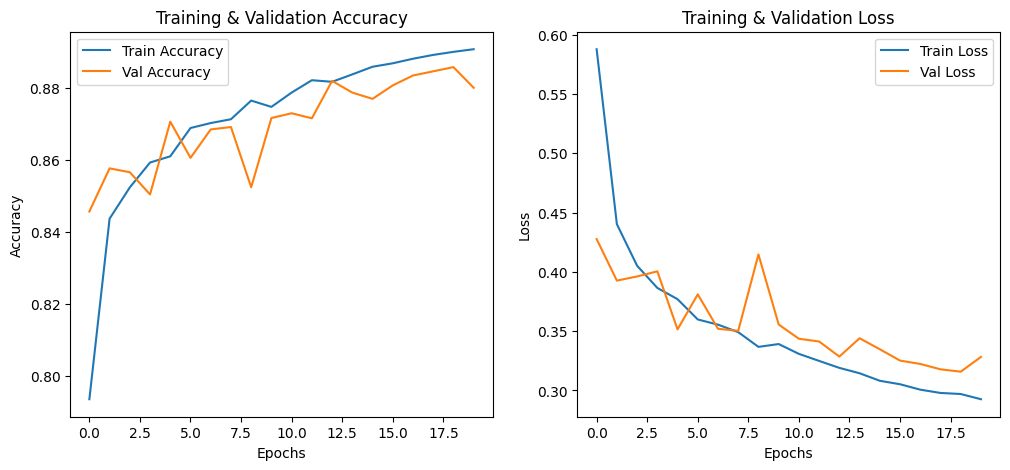

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2️⃣ Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3️⃣ Build enhanced MLP model
model = Sequential([
    Flatten(input_shape=(28,28)),          # 28x28 -> 784
    Dense(256, activation='relu'),
    BatchNormalization(),                  # Normalize layer output
    Dropout(0.3),                          # Dropout 30% neurons
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')        # Output layer
])

# 4️⃣ Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ Train model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

# 6️⃣ Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 7️⃣ Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

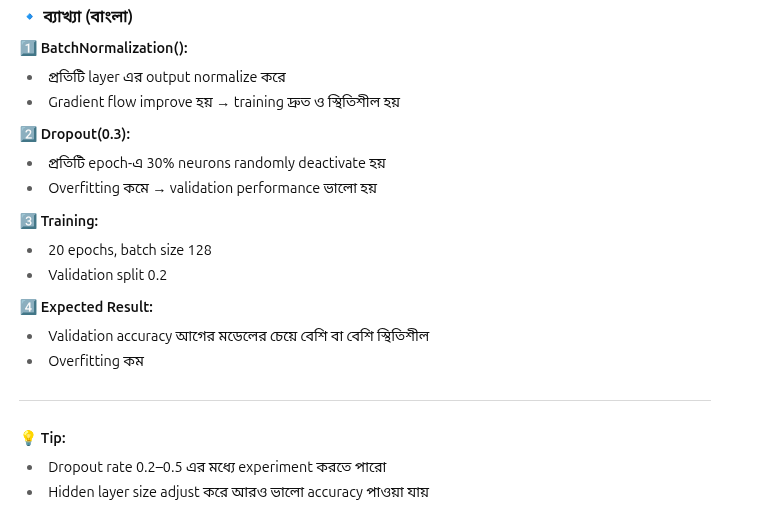

**Step 1: Predict on Test Set**

In [ ]:
import numpy as np

y_pred_probs = model.predict(x_test)          # প্রতিটি class এর probability
y_pred = np.argmax(y_pred_probs, axis=1)     # সর্বোচ্চ probability class নির্বাচন

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


প্রতিটি ইমেজের জন্য সর্বোচ্চ probability class কে predicted label হিসেবে নির্বাচন করা হয়েছে।

**Step 2: Confusion Matrix**

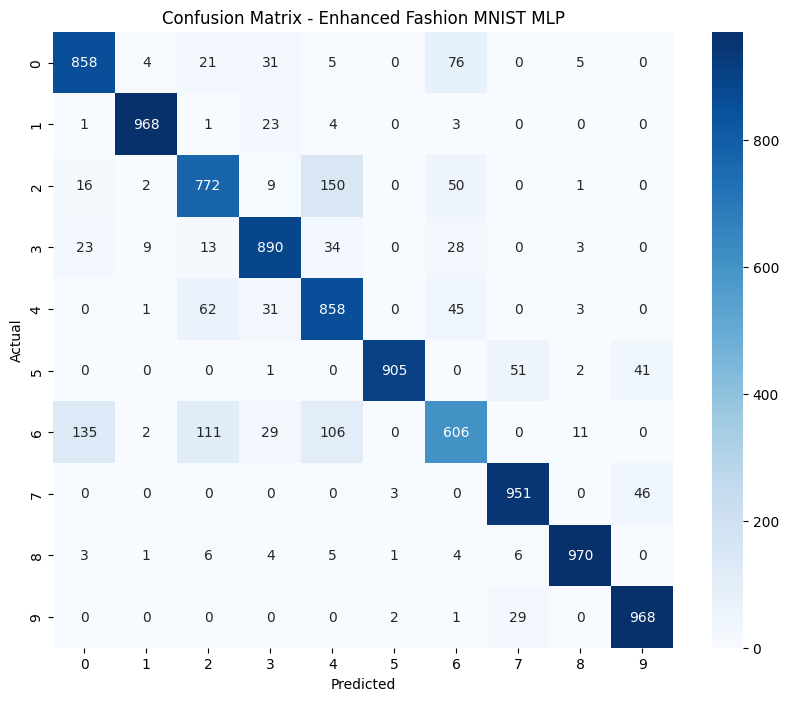

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Enhanced Fashion MNIST MLP')
plt.show()

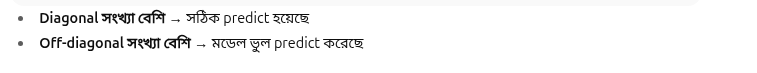

**Step 3: Visualize Some Predictions**

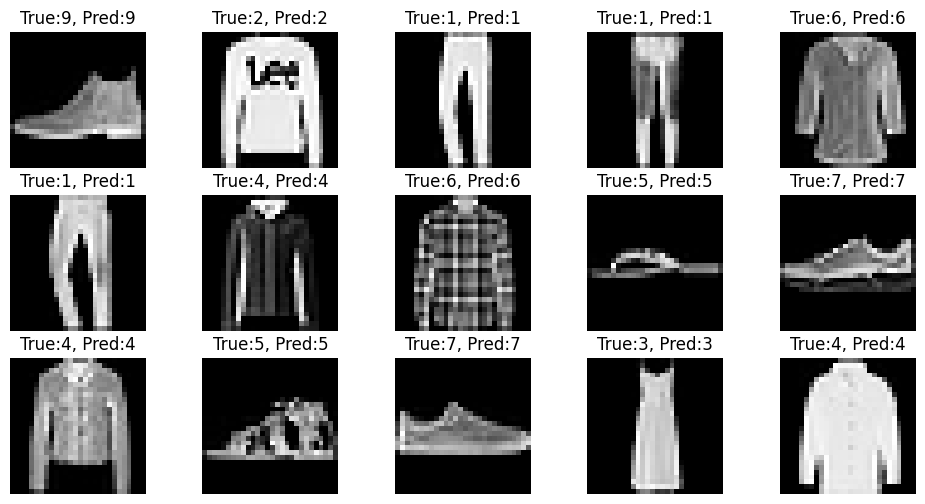

In [ ]:
plt.figure(figsize=(12,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True:{y_test[i]}, Pred:{y_pred[i]}")
    plt.axis('off')
plt.show()

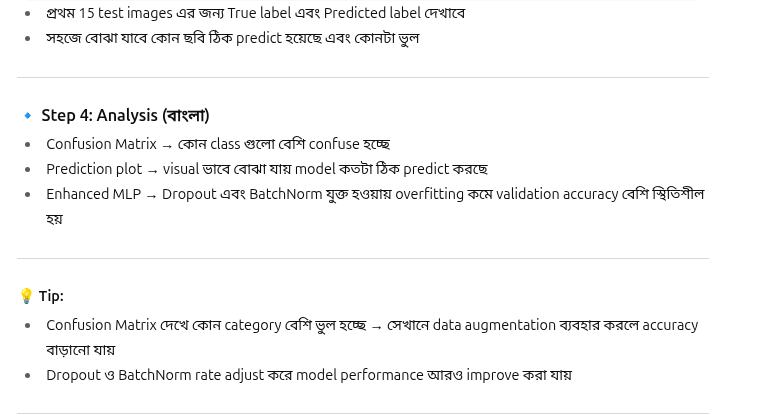

**Example : CIFAR-10 dataset**

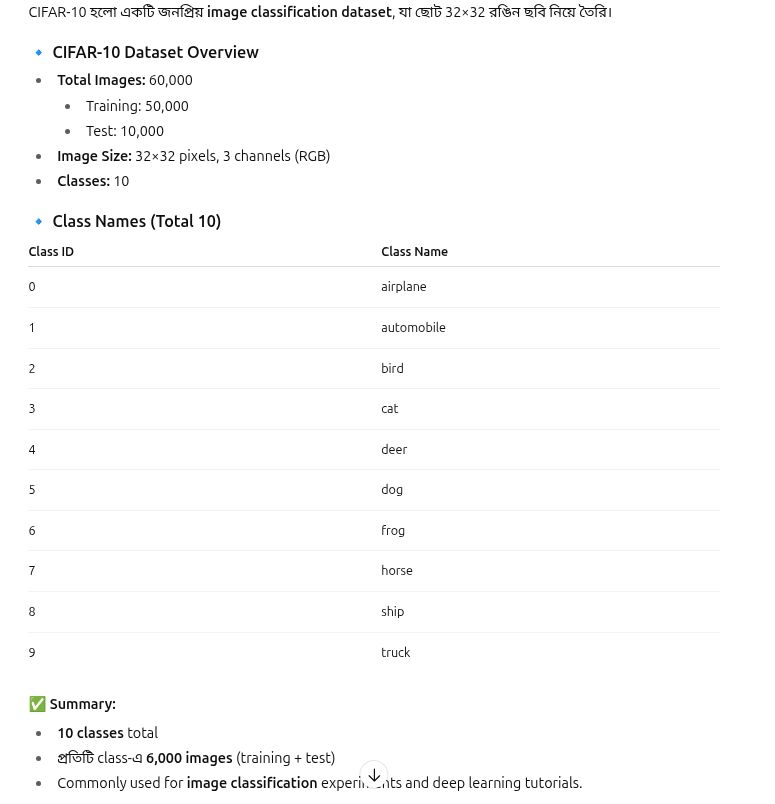

In [ ]:
# ✅ Step 0: Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [ ]:
# ✅ Step 1: Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Normalize images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

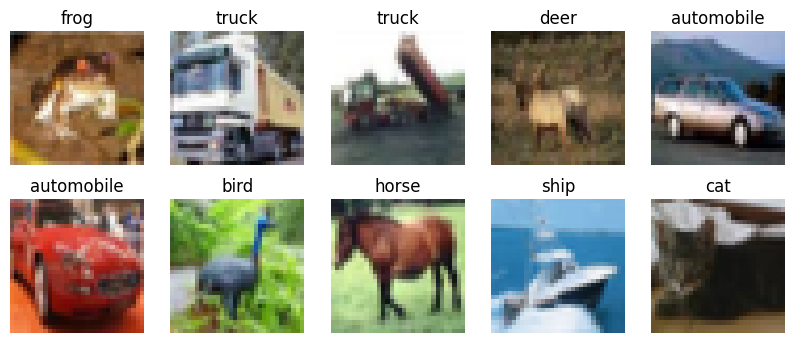

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])  # label to class name
    plt.axis('off')
plt.show()

In [ ]:
# ✅ Step 2: Build MLP Model
model = Sequential([
    Flatten(input_shape=(32,32,3)),  # Flatten 32x32x3 image to 1D
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ✅ Step 3: Train the Model
history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2585 - loss: 2.1510 - val_accuracy: 0.3774 - val_loss: 1.7496
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3846 - loss: 1.7160 - val_accuracy: 0.4124 - val_loss: 1.6467
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4187 - loss: 1.6302 - val_accuracy: 0.4030 - val_loss: 1.6682
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4447 - loss: 1.5567 - val_accuracy: 0.4606 - val_loss: 1.5216
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4608 - loss: 1.5109 - val_accuracy: 0.4600 - val_loss: 1.5188
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4796 - loss: 1.4676 - val_accuracy: 0.4728 - val_loss: 1.4918
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4928 - loss: 1.4309 - val_accuracy: 0.4884 - val_loss: 1.4724
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5034 - loss: 1.4016 - val_accuracy: 0.

Test Accuracy: 50.22%


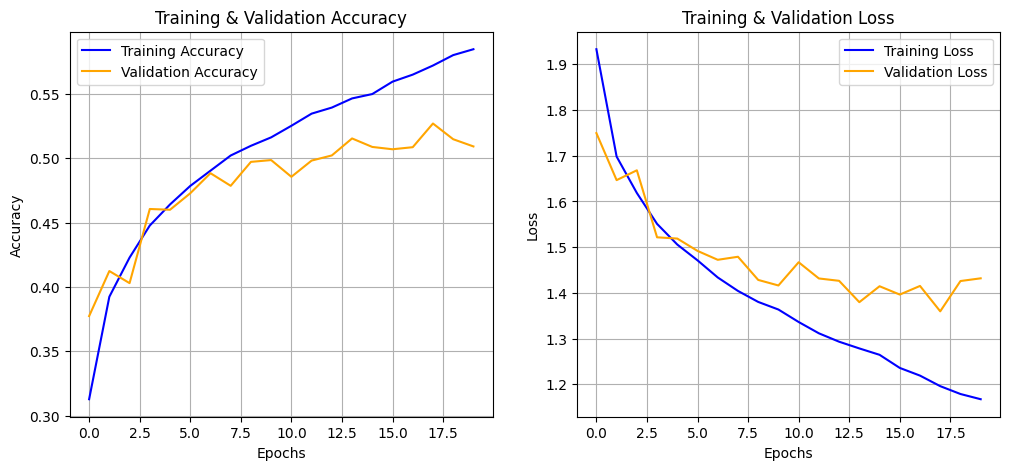

In [ ]:
# ✅ Step 4: Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Visualize Training History
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Step 1: Predict on Test Set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


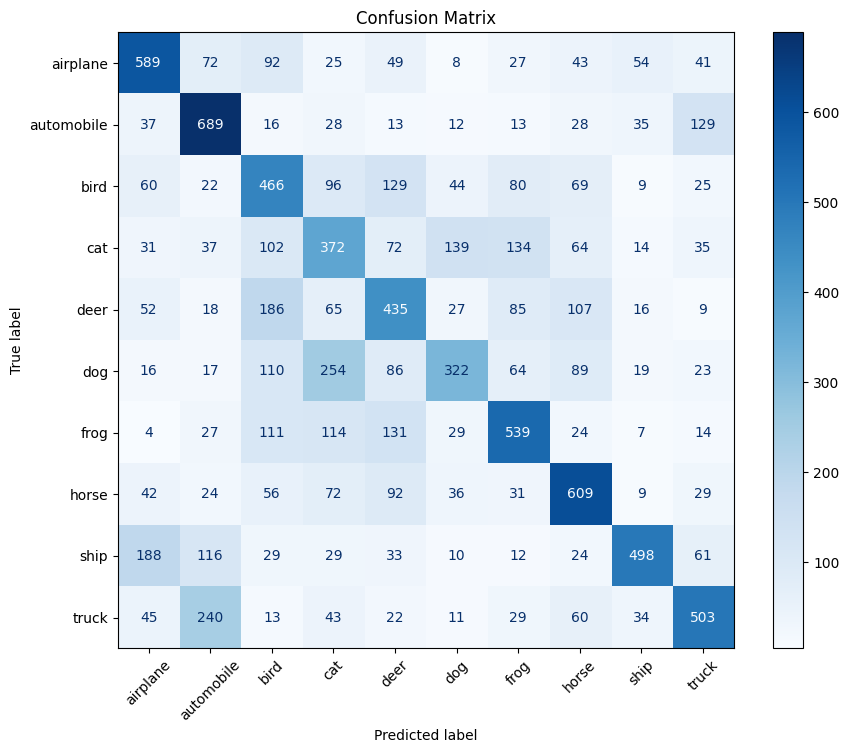

In [ ]:
# Step 2: Confusion Matrix

plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=plt.gca(), cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


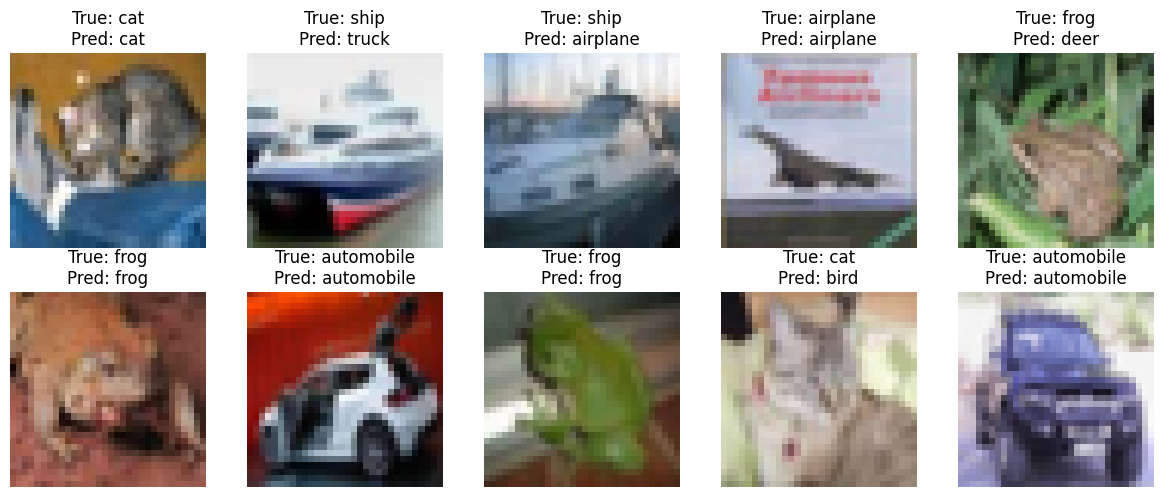

In [ ]:
# Step 3: Visualize Some Predictions
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()